<a href="https://colab.research.google.com/github/Kay-Zhang1625/Project/blob/master/%5BKaggle%5D_Store_Sales_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datas_holidays_events = pd.read_csv("holidays_events.csv", encoding="utf-8")
datas_oil = pd.read_csv("oil.csv", encoding="utf-8")
datas_stores = pd.read_csv("stores.csv", encoding="utf-8")
datas_transactions = pd.read_csv("transactions.csv", encoding="utf-8")
datas_train = pd.read_csv("train.csv", encoding="utf-8")
datas_test = pd.read_csv("test.csv", encoding="utf-8")

# datas_holidays_events
# s = datas_train.isna().values
# datas_train[s == True]

# sns.lineplot(x=datas_transactions['date'], y=datas_transactions['transactions'], hue=datas_transactions['store_nbr'])
# chart = datas_transactions.plot(figsize=(5, 5))  # 圖表大小
# plt.show()

In [2]:
datas_total = pd.concat([datas_train, datas_test])
# datas_total

In [3]:
import datetime
start = datetime.datetime.strptime("2013-01-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2017-12-31", "%Y-%m-%d")
date_generated = pd.date_range(start, end).strftime("%Y-%m-%d")
date_generated = pd.DataFrame(date_generated, columns=["date"])

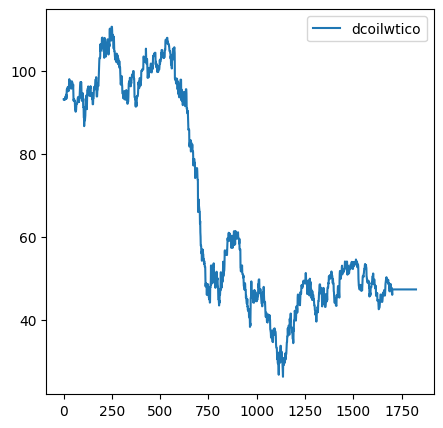

In [4]:
datas_oil = pd.merge(date_generated, datas_oil, how="left", on=["date"])

datas_oil = datas_oil.fillna(method="ffill")
datas_oil = datas_oil.fillna(method="bfill")
chart = datas_oil.plot(figsize=(5, 5))  # 圖表大小
plt.show()

In [ ]:
datas_holidays_events[["description_1", "description_2"]] = datas_holidays_events["description"].str.split(pat="-", expand=True)
datas_holidays_events[["description_1", "description_3"]] = datas_holidays_events["description_1"].str.split(pat="[+]", expand=True)
datas_holidays_events["description_2"] = '-' + datas_holidays_events["description_2"]

for i in range(len(datas_holidays_events["description_2"])):
  if pd.isna(datas_holidays_events["description_2"][i]):
    datas_holidays_events["description_2"][i] = datas_holidays_events["description_3"][i]
  else:
    datas_holidays_events["description_2"][i]
datas_holidays_events = datas_holidays_events.drop(["description", "description_3"], axis=1)
datas_holidays_events

In [6]:
# datas_holidays_events = datas_holidays_events.drop("description", axis=1)

datas_stores = datas_stores.rename(columns={"city":"locale",
                                            "type":"store_type"})
datas_holidays_events = datas_holidays_events.rename(columns={"type": "date_type",
                                                              "locale": "holiday_locale"})

datas_new = pd.merge(datas_total, datas_stores, how="left", on=["store_nbr"])
datas_new = pd.merge(datas_new, datas_holidays_events, how="left", on=["date"])
datas_new = pd.merge(datas_new, datas_oil, how="left", on=["date"])
datas_new = pd.merge(datas_new, datas_transactions, how="left", on=["date", "store_nbr"])
# datas_new

In [ ]:
s = datas_new.isna().sum()
f = s > 0
s[f].sort_values(ascending=False)

description_2     2956338
date_type         2578554
holiday_locale    2578554
locale_name       2578554
transferred       2578554
description_1     2578554
transactions       277629
sales               28512
dtype: int64

In [7]:
datas_new["description_1"] = datas_new["description_2"].fillna("Normal Day")
datas_new["description_2"] = datas_new["description_2"].fillna(0)
datas_new["holiday_locale"] = datas_new["holiday_locale"].fillna("National") # 這邊可能可以換
datas_new["date_type"] = datas_new["date_type"].fillna("Normal Day")
datas_new["transferred"] = datas_new["transferred"].fillna("False")
datas_new["transactions"] = datas_new["transactions"].fillna(0)

In [8]:
# 日期資料擴充
datas_new["weekday"] = [pd.Timestamp(i).day_name() for i in datas_new["date"]]
datas_new["quarter"] = [pd.Timestamp(i).quarter for i in datas_new["date"]]
datas_new["month"] = [pd.Timestamp(i).month for i in datas_new["date"]]
datas_new["year"] = [pd.Timestamp(i).year for i in datas_new["date"]]
# datas_new["day"] = [pd.Timestamp(i).day for i in datas_new["date"]]
# datas_new

In [9]:
is_weekend = []
for i in range(len(datas_new)):
  if datas_new["weekday"][i] == "Friday":
    is_weekend.append(1)
  elif datas_new["weekday"][i] == "Saturday" or datas_new["weekday"][i] == "Sunday":
    is_weekend.append(2)
  else:
    is_weekend.append(0)

datas_new["is_weekend"] = is_weekend

Did Earhquake affect the store sales?

In [ ]:
# March
march = pd.pivot_table(datas_new[(datas_new["month"].isin([3]))],
                       index=datas_new["year"],
                       columns="family",
                       values="sales", aggfunc="mean")
march

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
year,,,,,,,,,,,,,,,,,,,,,
2013,4.560932,0.000000,2.330346,1088.542413,0.000000,354.853526,0.000000,899.277180,365.894863,195.494296,...,0.000000,313.938676,190.713262,0.000000,0.000000,190.441733,90.362182,2.411589,0.000000,23.941057
2014,6.042413,0.043011,3.086022,2646.471924,0.000000,388.987692,12.830346,1057.511350,709.575269,227.415349,...,1.170251,332.993349,231.297491,4.785544,9.594385,390.943043,97.848576,2002.596327,1.335125,23.890751
2015,6.902031,0.000000,2.538232,1385.922342,0.000000,500.669417,0.000000,1115.107527,737.664875,301.454903,...,0.000000,326.473811,289.569892,0.000000,0.000000,384.931138,95.655186,4.124851,0.000000,26.169936
2016,7.203106,0.264038,4.261051,2967.511947,0.000000,492.651516,13.970131,1057.762843,843.405018,272.667234,...,5.959976,324.644176,290.982676,5.780765,8.557945,368.022836,107.821004,2262.134630,1.922342,23.449707
2017,7.642772,0.264038,4.212067,3664.010155,0.281959,573.421241,13.947431,1197.510753,972.788530,320.441513,...,6.161888,367.350973,325.296894,8.627838,11.180406,388.023902,111.916694,2396.963142,4.925926,25.063907


In [ ]:
# April
april = pd.pivot_table(datas_new[(datas_new["month"].isin([4]))],
                       index=datas_new["year"],
                       columns="family",
                       values="sales", aggfunc="mean")
april

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
year,,,,,,,,,,,,,,,,,,,,,
2013,4.620370,0.000000,2.265432,1076.000617,0.000000,351.001987,0.000000,877.300000,345.425926,195.162783,...,0.000000,321.711827,201.569753,0.000000,0.000000,188.420076,80.945479,3.893827,0.000000,21.172472
2014,5.201235,0.000000,2.394444,1304.398148,0.000000,353.837909,0.000000,896.440741,678.221605,215.213918,...,0.000000,302.611760,225.521605,0.000000,0.000000,347.227843,92.550206,4.414815,0.000000,19.701996
2015,5.584568,0.000000,2.467901,1424.164815,0.000000,493.748901,0.000000,1129.893210,729.123457,296.434968,...,1.345679,322.410050,280.970988,0.000000,0.000000,372.965106,95.475383,4.421605,0.000000,24.681155
2016,7.145759,0.225806,5.077658,3529.086022,0.000000,525.742289,14.065711,1226.231780,874.803465,291.756448,...,6.841697,358.389184,390.849462,6.707288,11.523895,395.592436,108.034633,2217.003426,5.556750,24.055408
2017,8.161290,0.185783,4.617085,3649.302270,0.161888,539.214472,13.926523,1236.851852,960.898447,318.637558,...,7.077061,351.644797,335.820191,9.063321,12.238949,372.121268,101.319828,2303.228760,17.576464,22.631513


In [ ]:
# May
may = pd.pivot_table(datas_new[(datas_new["month"].isin([5]))],
                     index=datas_new["year"],
                     columns="family",
                     values="sales", aggfunc="mean")
may

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
year,,,,,,,,,,,,,,,,,,,,,
2013,5.378472,0.000000,2.226852,1096.029514,0.0000,369.368368,0.000000,885.340856,356.175926,208.577553,...,0.000000,325.077484,184.948495,0.000000,0.000000,193.017919,85.113382,5.654514,0.000000,22.309167
2014,4.823775,0.000000,2.163680,1243.594982,0.0000,371.376630,0.000000,895.068100,658.005974,226.424023,...,0.000000,327.115551,238.545998,0.000000,0.000000,358.785254,87.823661,5.432497,0.000000,21.444462
2015,5.572879,0.000000,3.011947,2111.170848,0.0000,527.189014,0.000000,1143.790323,772.585424,314.021200,...,1.768220,353.459916,300.913381,0.111111,0.000000,396.078818,94.243751,6.076464,0.000000,25.392373
2016,7.206878,0.283069,4.660317,3192.553439,0.0000,564.665780,13.887831,1188.984656,930.013757,300.740817,...,6.860847,357.126549,338.059259,6.907407,9.784127,391.917004,106.388951,2309.795186,7.102646,24.105692
2017,7.059737,0.166667,5.900239,3487.099761,0.0908,566.843280,13.338112,1352.649940,966.421147,322.572431,...,6.640980,367.788181,310.506571,8.976703,12.050777,392.489781,91.215556,2460.593033,5.769415,23.695576


In [ ]:
march = march.sum(axis=1).reset_index()
march["month"] = "march"

april = april.sum(axis=1).reset_index()
april["month"] = "april"

may = may.sum(axis=1).reset_index()
may["month"] = "may"

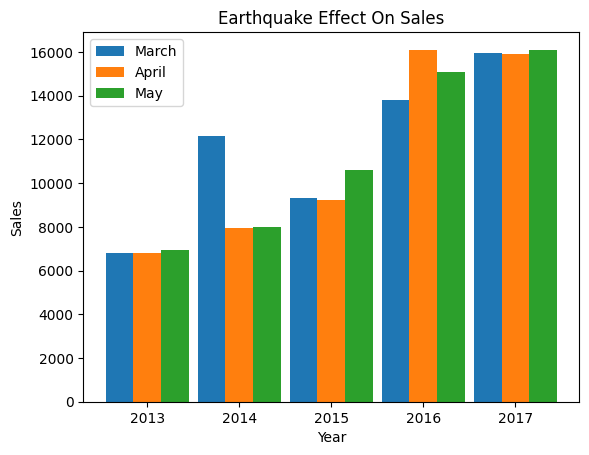

In [ ]:
width = 0.3

x1 = march["year"]
x2 = [i + width for i in x1]
x3 = [i + 2*width for i in x1]

h1 = march[0]
h2 = april[0]
h3 = may[0]

plt.bar(x1, h1, label="March", width=0.3)
plt.bar(x2, h2, label="April", width=0.3)
plt.bar(x3, h3, label="May", width=0.3)
plt.xticks([i + width for i in x1], x1)        #設定 X 軸刻度標籤
plt.legend()
plt.title("Earthquake Effect On Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

In [ ]:
data_family = datas_new.groupby(["family", "year"]).agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:15]
data_family

,family,year,sales
64,GROCERY I,2017,4672.416301
63,GROCERY I,2016,4404.609447
62,GROCERY I,2015,3878.845765
19,BEVERAGES,2017,3596.185426
61,GROCERY I,2014,3344.577017
18,BEVERAGES,2016,3152.996848
60,GROCERY I,2013,2971.359781
17,BEVERAGES,2015,2466.197112
154,PRODUCE,2017,2390.272212
153,PRODUCE,2016,2249.540912


In [ ]:
datas_train_len = len(datas_new) - len(datas_test)

x = datas_new.iloc[:datas_train_len]
x = x.astype("str")

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
x = pd.DataFrame(enc.fit_transform(x),
                 columns=x.columns)

import seaborn as sns
plt.figure(figsize=(20,18))
sns.heatmap(x[x.columns[1:]].corr(),
            linewidths=0.1,
            square=True,
            linecolor="white",
            annot=True,
            cmap="PiYG",
            vmin=-0.1,
            vmax=0.1)
plt.title("Correlations")
plt.show()

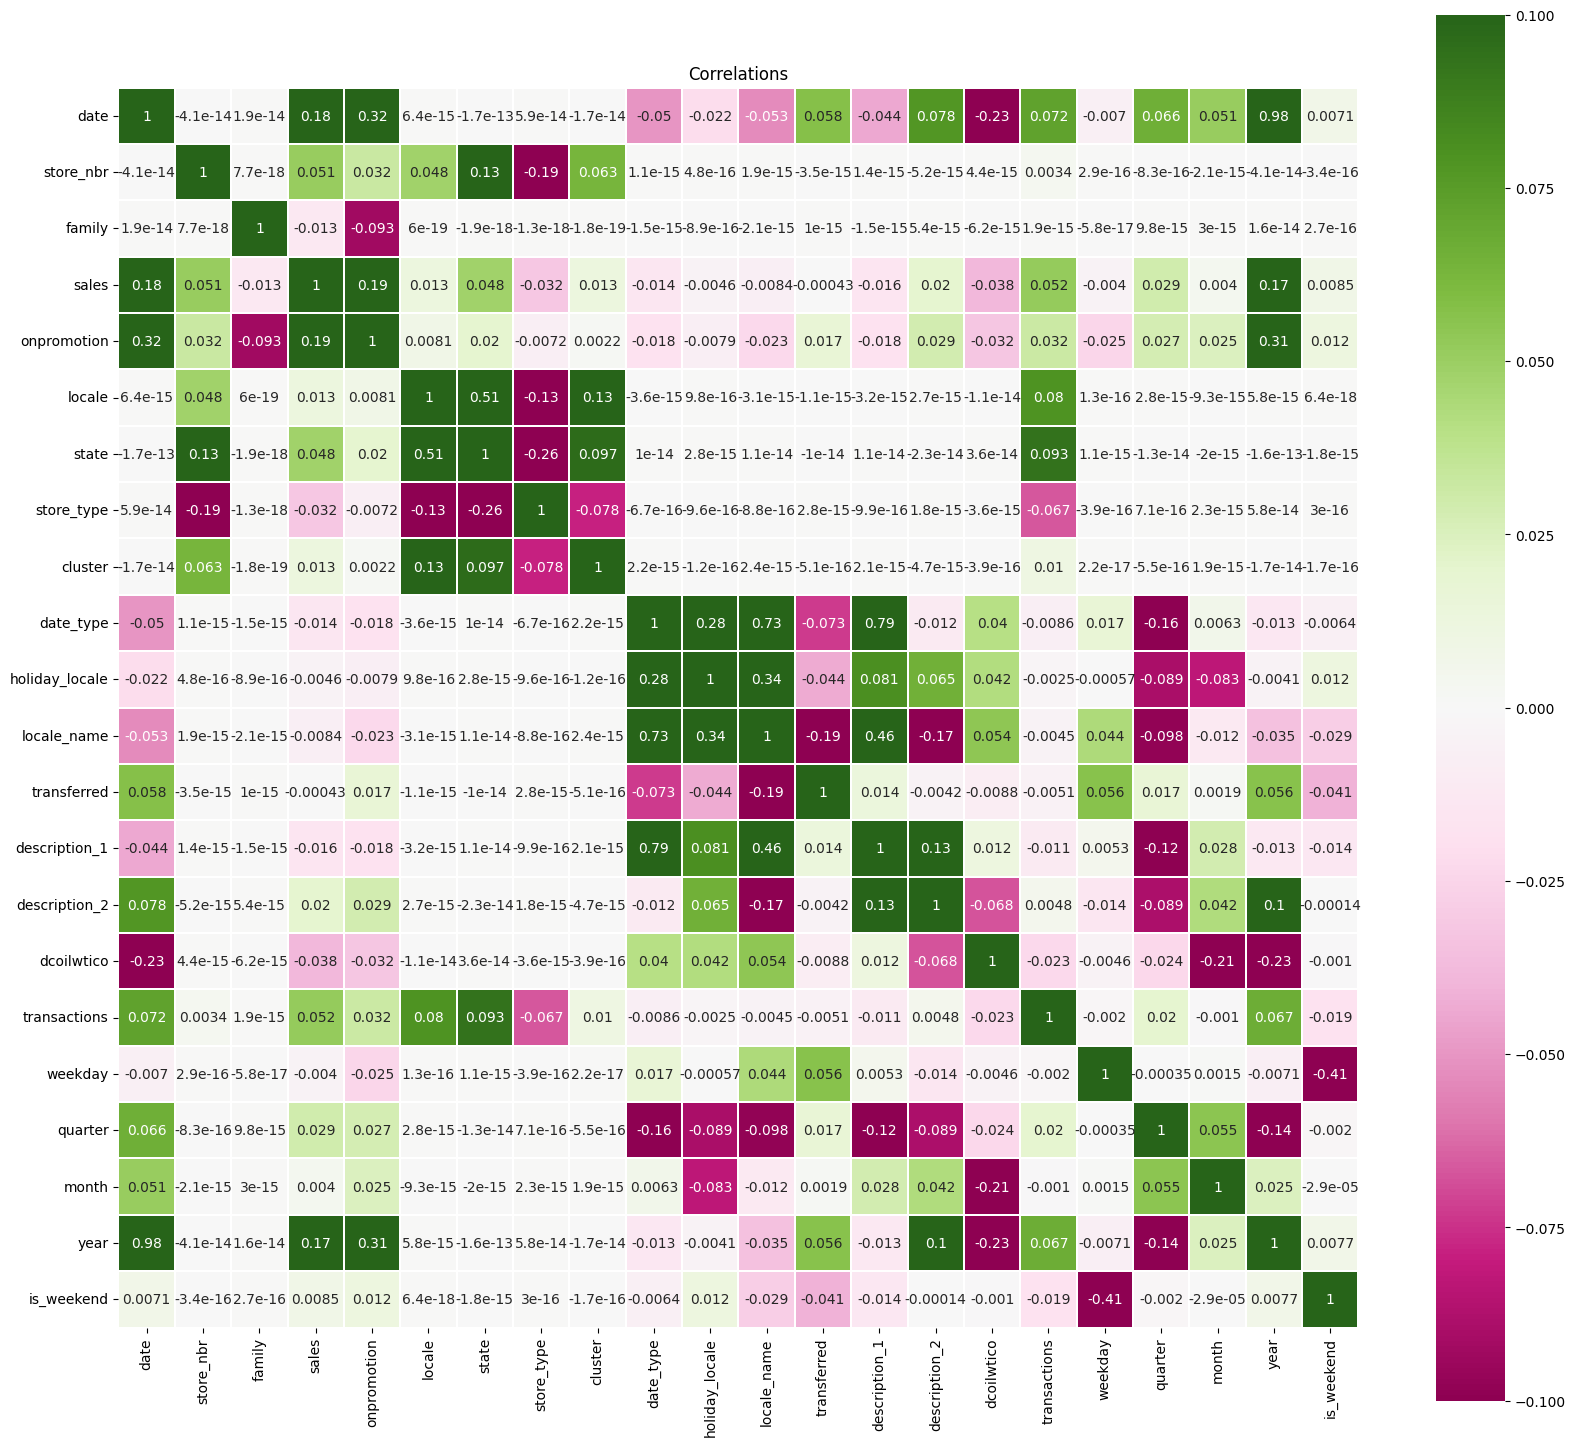

In [14]:
import seaborn as sns
plt.figure(figsize=(20,18))
sns.heatmap(x[x.columns[1:]].corr(),
            linewidths=0.1,
            square=True,
            linecolor="white",
            annot=True,
            cmap="PiYG",)
plt.title("Correlations")
plt.show()

In [10]:
datas_new = datas_new.drop(["holiday_locale","transferred","weekday","month"], axis=1)

## One-hot Encoding / OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

datas_train_len = len(datas_new) - len(datas_test)
datas_new_x = datas_new.iloc[:datas_train_len]
datas_new_y = datas_new_x["sales"]
datas_new_x = datas_new_x.drop(["id", "sales"], axis=1)
datas_new_x = datas_new_x.astype("str")

enc = OrdinalEncoder()
datas_new_x = pd.DataFrame(enc.fit_transform(datas_new_x),
                           columns=datas_new_x.columns)

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(datas_new_x, datas_new_y, test_size=0.1)



---



In [11]:
datas_train_len = len(datas_new) - len(datas_test)

x = datas_new.iloc[:datas_train_len]
y = x["sales"]
x = x.drop(["id", "sales"], axis=1)
x = x.astype("str")
x_predict = datas_new.iloc[datas_train_len:]
x_predict = x_predict.drop(["id", "sales"], axis=1)
x_predict = x_predict.astype("str")

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
x = pd.DataFrame(enc.fit_transform(x),
                 columns=x.columns)
x_predict = pd.DataFrame(enc.fit_transform(x_predict),
                         columns=x_predict.columns)

## XGBoost

In [ ]:
import xgboost as xgb

xgbrModel = xgb.XGBRegressor()
xgbrModel.fit(data_train, target_train)
pre = xgbrModel.predict(data_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(target_test, pre)

0.9363928333514375



---



In [12]:
import xgboost as xgb

xgbrModel = xgb.XGBRegressor()
xgbrModel.fit(x, y)
pre = xgbrModel.predict(x_predict)

result = pd.DataFrame({
    "id":datas_test["id"],
    "sales":pre
})
result.to_csv("result_xgboost.csv", encoding="utf-8", index=False)

In [ ]:
# 先做標準化，再做PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

datas_train_len = len(datas_new) - len(datas_test)
datas_new_x = datas_new.iloc[:datas_train_len]
datas_new_y = datas_new_x["sales"]
datas_new_x = datas_new_x.drop(["id", "sales"], axis=1)
datas_new_x = datas_new_x.astype("str")

enc = OrdinalEncoder()
datas_new_x = pd.DataFrame(enc.fit_transform(datas_new_x),
                           columns=datas_new_x.columns)

x = StandardScaler().fit_transform(datas_new_x)
pd.DataFrame(data = x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.735432,-1.700267,-1.680336,-0.355762,0.869062,0.769193,0.83205,-0.739018,-1.004074,0.208506,-2.63631,-0.068802,0.191659,-0.058085,1.152559,-0.93567,0.999858,-1.280868,-1.641079,-1.662392
1,-1.735432,-1.700267,-1.575315,-0.355762,0.869062,0.769193,0.83205,-0.739018,-1.004074,0.208506,-2.63631,-0.068802,0.191659,-0.058085,1.152559,-0.93567,0.999858,-1.280868,-1.641079,-1.662392
2,-1.735432,-1.700267,-1.470294,-0.355762,0.869062,0.769193,0.83205,-0.739018,-1.004074,0.208506,-2.63631,-0.068802,0.191659,-0.058085,1.152559,-0.93567,0.999858,-1.280868,-1.641079,-1.662392
3,-1.735432,-1.700267,-1.365273,-0.355762,0.869062,0.769193,0.83205,-0.739018,-1.004074,0.208506,-2.63631,-0.068802,0.191659,-0.058085,1.152559,-0.93567,0.999858,-1.280868,-1.641079,-1.662392
4,-1.735432,-1.700267,-1.260252,-0.355762,0.869062,0.769193,0.83205,-0.739018,-1.004074,0.208506,-2.63631,-0.068802,0.191659,-0.058085,1.152559,-0.93567,0.999858,-1.280868,-1.641079,-1.662392


In [ ]:
pca = PCA(n_components=2)
datas_new_x = pca.fit_transform(datas_new_x)
pca.explained_variance_ratio_

array([0.90755255, 0.06965285])

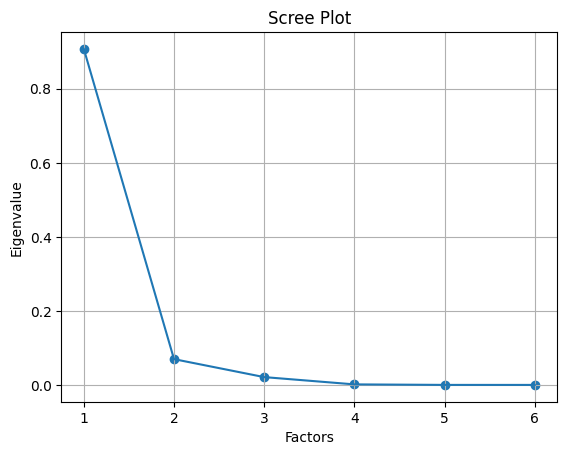

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,7), importance)
plt.plot(range(1,7), importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
pd.DataFrame(data=pca.components_, columns=datas_new_x.columns)

,date,store_nbr,family,onpromotion,locale,state,store_type,cluster,date_type,holiday_locale,locale_name,transferred,description_1,description_2,dcoilwtico,transactions,weekday,quarter,month,day
0,0.021512,0.000039,-3.122995e-08,0.001445,0.000283,0.000218,-0.000045,0.000026,-0.000004,-3.964726e-07,-0.000018,-2.123515e-07,-0.000038,0.000008,-0.003993,0.999760,-0.000002,0.000013,-0.000003,0.000018
1,-0.979304,0.000003,1.361109e-05,-0.048321,0.000080,0.000061,-0.000013,0.000007,0.000086,1.251700e-05,0.000746,-6.787456e-06,0.000571,-0.000437,0.195311,0.021922,0.000026,-0.000130,-0.000374,0.000010


In [ ]:
datas_train_len = len(datas_new) - len(datas_test)

x = datas_new.iloc[:datas_train_len]
y = x["sales"]
x = x.drop(["id", "sales"], axis=1)
x = x.astype("str")
x_predict = datas_new.iloc[datas_train_len:]
x_predict = x_predict.drop(["id", "sales"], axis=1)
x_predict = x_predict.astype("str")

In [ ]:
x = datas_new.drop(["id", "sales"], axis=1)
x = x.astype("str")
y = datas_new["sales"]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
x = pd.DataFrame(enc.fit_transform(x),
                 columns=x.columns)
x_predict = pd.DataFrame(enc.fit_transform(x_predict),
                         columns=x_predict.columns)

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=14)
reg.fit(data_train, target_train)
# reg.fit(datas_new_x, datas_new_y)

DecisionTreeRegressor(max_depth=14)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(reg, data_train, target_train.astype('int'), cv=5, scoring='r2')
print(scores)
print(np.average(scores))

[0.0457514  0.04147678 0.0540311  0.04784702 0.05187992]
0.048197246621530666


In [ ]:
pre = reg.predict(x_predict)
result = pd.DataFrame({
    "id":datas_test["id"],
    "sales":pre
})
result.to_csv("result_reg.csv", encoding="utf-8", index=False)

## Radom Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
params = {
    "n_estimators":range(21, 100, 2),
    "max_depth":range(2, 10)
}
search = GridSearchCV(clf, params, n_jobs=-1, cv=10)
search.fit(x, y)
print(search.best_params_)
print(search.best_score_)